# Zad 1.
Wylosuj próbkę 1000-elementową liczb pseudolosowych zgodnie z modelem przedstawionym na wykładzie.

In [11]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

def gen_random(n_samples, m, a, c, seed):
    results = []
    temp = seed
    for i in range(n_samples):
        temp = (a * temp + c) % m
        results.append(temp)
    return results

gen_random(1000, 2 ** 31, 48271, 0, 666)

[32148486,
 1356373850,
 1040653126,
 1577034778,
 1045414534,
 1634210010,
 1434550726,
 1587864986,
 1991858438,
 1860772442,
 695486534,
 218613530,
 2106544006,
 1634980826,
 2135387846,
 239093914,
 725198342,
 2065704282,
 1650652486,
 560359962,
 1579179142,
 1476794074,
 607050694,
 529673114,
 2058056454,
 1849534554,
 1544757830,
 2077986074,
 1799547270,
 232708570,
 1735903430,
 1130008218,
 542031878,
 1627499354,
 1774505798,
 489107482,
 272037510,
 1807621338,
 1281504710,
 1247375770,
 929271046,
 204222042,
 1052245062,
 638145306,
 406619014,
 2053365722,
 908993222,
 625923226,
 992598534,
 1216164186,
 1848420678,
 1463940634,
 781422726,
 1653613274,
 1746636742,
 1694152602,
 115451654,
 246723674,
 1801639494,
 294721818,
 1585192326,
 1828906458,
 90864838,
 974985882,
 1439364102,
 2006103898,
 161121094,
 1438039066,
 322316934,
 41691354,
 291170758,
 1970666906,
 1126547718,
 1003960922,
 2081665094,
 1148378906,
 402765702,
 733735898,
 1865209542,
 130375

# Zad 2.
Wylosuj próbkę 1000-elementową z rozkładu jednostajnego na odcinku (wykorzystując kod z Zad 1.).

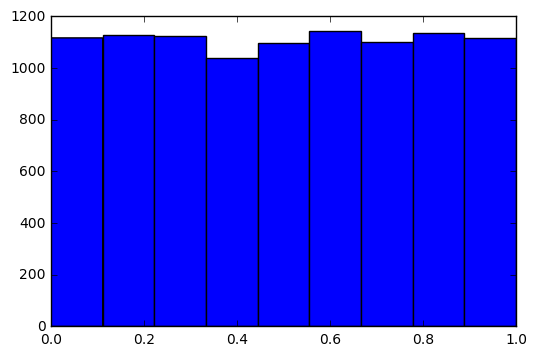

In [12]:
def gen_uniform(n_samples, lower_bound, upper_bound, m, a, c, seed):
    return list(map(lambda x: x / m * (upper_bound - lower_bound) + lower_bound, gen_random(n_samples, m, a, c, seed)))

x = gen_uniform(10000, 0, 1, 2 ** 31, 48271, 0, 444)

bins = np.linspace(0, 1, 10)
_ = plt.hist(x, bins=bins)

Dzielenie przez maks z próbki:

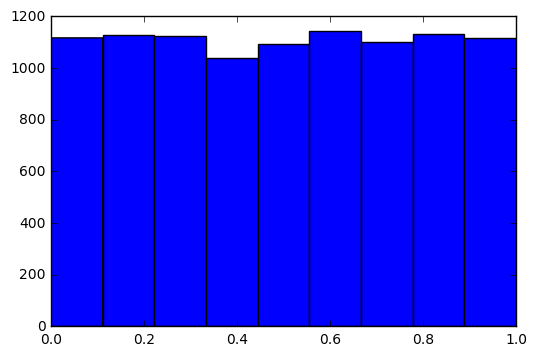

In [13]:
def gen_not_uniform(n_samples, lower_bound, upper_bound, m, a, c, seed):
    rands = gen_random(n_samples, m, a, c, seed)
    return list(map(lambda x: x / max(rands) * (upper_bound - lower_bound) + lower_bound, rands))

x = gen_not_uniform(10000, 0, 1, 2 ** 31, 48271, 0, 444)

bins = np.linspace(0, 1, 10)
_ = plt.hist(x, bins=bins)

# Zad 3.
Wylosuj próbkę 1000-elementową z rozkładu normalnego za pomocą metody odwrotnej do dystrybuanty [link](http://staff.iiar.pwr.wroc.pl/grzegorz.mzyk/kmi/kmi03.pdf).

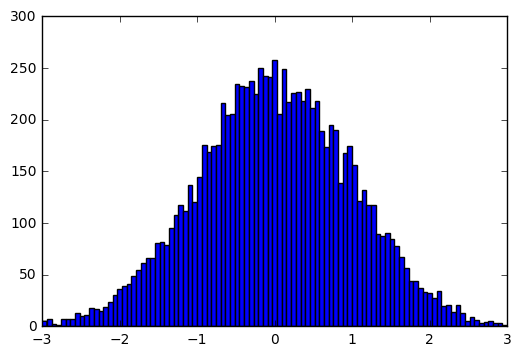

In [14]:
from scipy.stats import norm

def gen_gaussian(n_samples, mean, stddev, m, a, c, seed):
    return list(map(lambda x: norm.ppf(x, loc=mean, scale=stddev), gen_uniform(n_samples, 0, 1, m, a, c, seed)))

x = gen_gaussian(10000, 0, 1, 2 ** 31, 48271, 0, 666)

bins = np.linspace(-3, 3, 100)
_ = plt.hist(x, bins=bins)

# Zad 4.
Narysuj gęstość rozkładu jednostajnego na odcinku $[0, 1]$ oraz rozkładu normalnego z parametrami $m=1$, $\sigma=0.3$.

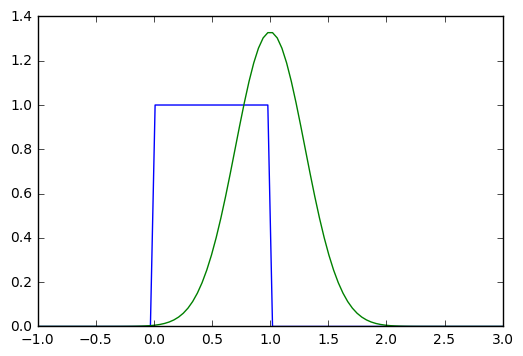

In [15]:
from scipy.stats import uniform

x = np.linspace(-1, 3, 100)
_ = plt.plot(x, uniform.pdf(x, 0, 1))
_ = plt.plot(x, norm.pdf(x, loc=1, scale=0.3))

# Zad 5.
Wylosuj próbkę 1000-elementową z rozkładów
* $\mathcal{N}(0, 1^{2})$
* $\mathcal{N}(3, 3^2)$
* $Unif(0, 1)$
* $Unif(-1, 1)$
* $Gamma(1, 2)$
* $LogN(.08, 2^{2})$

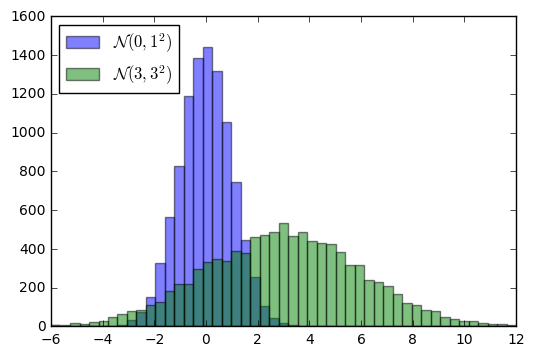

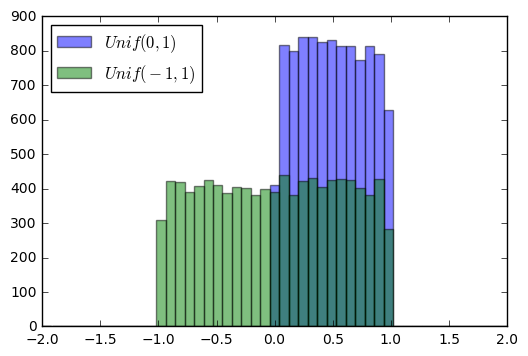

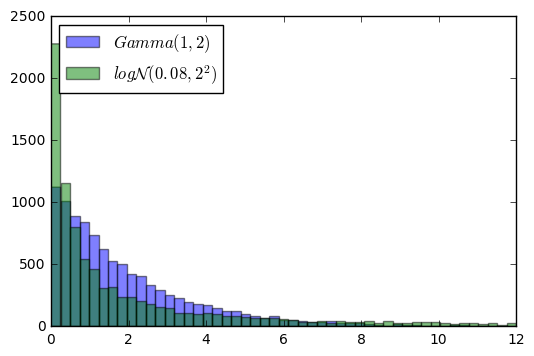

In [16]:
samples_1 = np.random.normal(loc=0, scale=1, size=10000)
samples_2 = np.random.normal(loc=3, scale=3, size=10000)
samples_3 = np.random.uniform(low=0, high=1, size=10000)
samples_4 = np.random.uniform(low=-1, high=1, size=10000)
samples_5 = np.random.gamma(shape=1, scale=2, size=10000)
samples_6 = np.random.lognormal(mean=0.08, sigma=2, size=10000)
bins_1 = np.linspace(-6, 12, 50)
bins_2 = np.linspace(-2, 2, 50)
bins_3 = np.linspace(0, 12, 50)
_ = plt.hist(samples_1, bins_1, alpha=0.5, label="$\mathcal{N}(0, 1^{2})$")
_ = plt.hist(samples_2, bins_1, alpha=0.5, label="$\mathcal{N}(3, 3^2)$")
_ = plt.legend(loc='upper left')
plt.show()
_ = plt.hist(samples_3, bins_2, alpha=0.5, label="$Unif(0, 1)$")
_ = plt.hist(samples_4, bins_2, alpha=0.5, label="$Unif(-1, 1)$")
_ = plt.legend(loc='upper left')
plt.show()
_ = plt.hist(samples_5, bins_3, alpha=0.5, label="$Gamma(1, 2)$")
_ = plt.hist(samples_6, bins_3, alpha=0.5, label="$log \mathcal{N}(0.08, 2^{2})$")
_ = plt.legend(loc='upper left')
plt.show()

# Zad 6.
Narysuj wykres 3d gęstości rozkładu normalnego.

(600, 600) (600, 600) (600, 600)


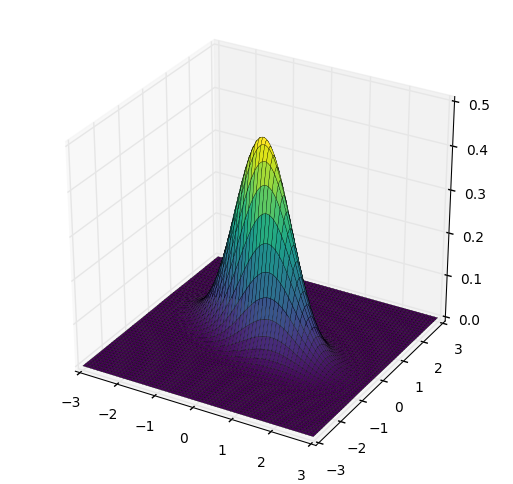

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from matplotlib import cm

X = np.arange(-3, 3, 0.01)
Y = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(X, Y)
cov = np.array([[ 0.6744121 , -0.16938146], [-0.16938146,  0.21243464]])
Z = mlab.bivariate_normal(X, Y, 
                      np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]),
                      0, 0, cov[1, 0])

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, linewidth=0.2, cmap=cm.viridis)


# Zad 7.
Prosze narysować poziomicę dwuwymiarowego rozkładu normalnego.

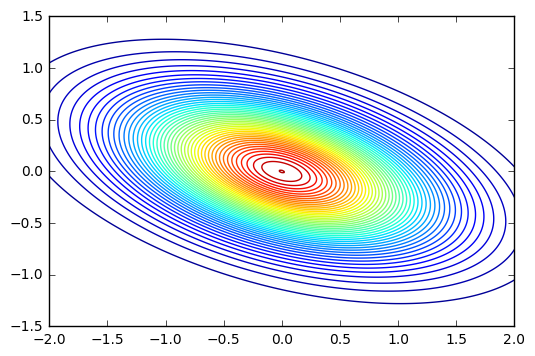

In [19]:
ax = plt.subplot()
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-2, 2)
levels = np.arange(0.0, 0.5, 0.01)
_ = plt.contour(X, Y, Z, levels, origincmap=cm.viridis)

# Zad 8.
Wylosuj próbkę z dwuwymiarowego rozkładu normalnego (nie diagonalną macierzą kowariancji).

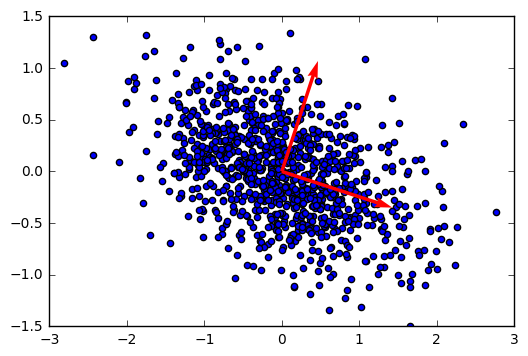

In [20]:
mean = [0, 0]
cov = np.array([[ 0.6744121 , -0.16938146], [-0.16938146,  0.21243464]])
samples = np.random.multivariate_normal(mean, cov, 1000)
w, v = np.linalg.eig(cov)
ax = plt.subplot()
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-3, 3)
_ = plt.scatter(samples[:,0], samples[:,1])
_ = ax.quiver(mean[0], mean[1], v[0], v[1], color='r', scale=4)

# Zad 9.
Pobierz dowolne zdjęcie i narysuj histogram z danych dla każdego z komponentów RGB.

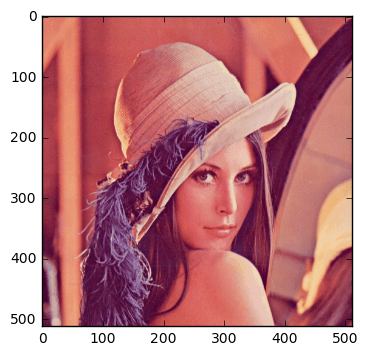

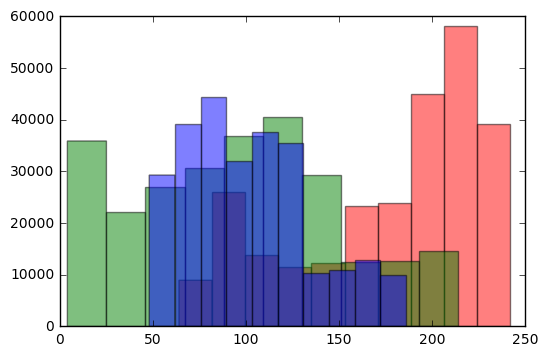

In [21]:
import matplotlib.image as mpimg

img = mpimg.imread("files/lena_color.gif")
_ = plt.imshow(img)
plt.show()
_ = plt.hist(img[:, :, 0].flatten(), color='r', alpha=0.5)
_ = plt.hist(img[:, :, 1].flatten(), color='g', alpha=0.5)
_ = plt.hist(img[:, :, 2].flatten(), color='b', alpha=0.5)

# Zad 10.
Pobierz dowolny plik z dźwiękiem i narysuj histogram [pliki](https://research.ics.aalto.fi/ica/cocktail/cocktail_en.cgi).

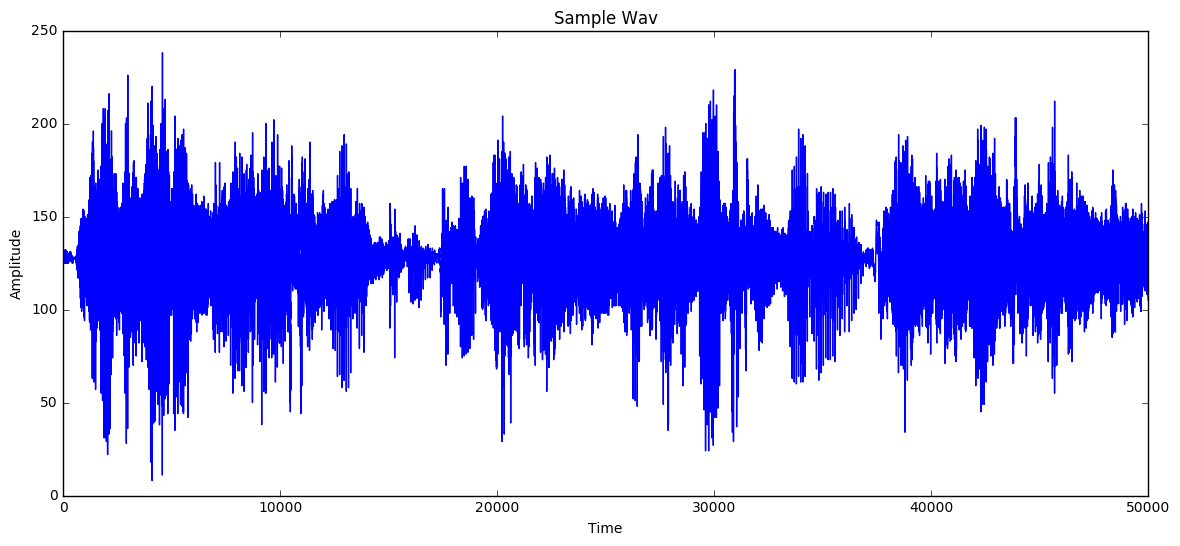

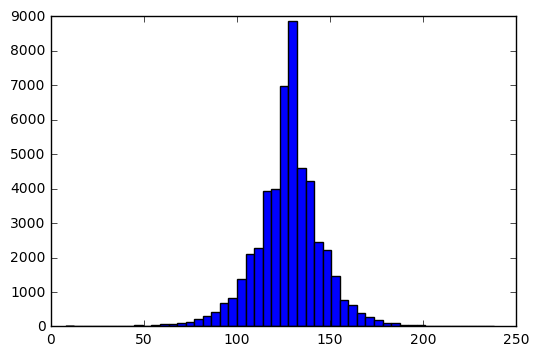

In [33]:
from scipy.io.wavfile import read

data = read("files/100001000mix1.wav")
audio = data[1]
plt.figure(figsize=(14,6))
plt.plot(audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")
plt.show()
plt.hist(audio, bins=50)
plt.show()